In [6]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt

In [7]:
# Specify the type and shape of input and output data.
input_data = tf.placeholder(dtype=tf.float32, shape=None)
output_data = tf.placeholder(dtype=tf.float32, shape=None)

In [8]:
# Identify parameters to be solved for
slope = tf.Variable(0.5, dtype=tf.float32)
intercept = tf.Variable(0.1, dtype=tf.float32)

In [9]:
# Create the operation used to calculate the guess
model_operation = slope * input_data + intercept

In [10]:
# Calculate the error of the algorithm's guess
error = model_operation - output_data
squared_error = tf.square(error)
loss = tf.reduce_mean(squared_error)

In [11]:
# Set the learning rate hyperparameter and bind the train variable.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
train = optimizer.minimize(loss)
# Initialize all our variables.
init = tf.global_variables_initializer()

In [12]:
# Create an arbitrary data set to bind to input_data and output_data in the feed_dict.    
x_values = [0, 1, 2, 3, 4]
y_values = [2*x + 1 for x in x_values]

[0.608, 0.139]
[2.0848742, 0.75335157]
[2.0640316, 0.81745505]
[2.04749, 0.86461663]
[2.0352206, 0.8995935]
[2.0261214, 0.9255339]
[2.019373, 0.9447724]
[2.0143678, 0.9590406]
[2.0106556, 0.96962273]
[2.0079026, 0.9774708]
[2.005861, 0.98329145]
[2.0043466, 0.98760843]
[2.0032241, 0.9908095]
[2.0023913, 0.99318355]
[2.0017736, 0.9949442]
[2.0013154, 0.9962501]
[2.0009763, 0.99721843]
[2.0007248, 0.99793625]
[2.0005379, 0.9984685]
[2.0004, 0.99886304]
2.4072122e-07


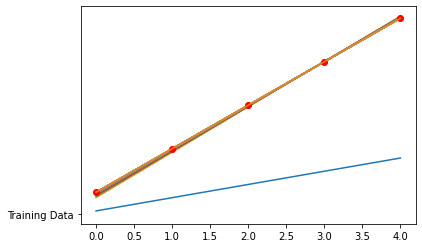

In [13]:
# Run the simulation 2000 times using tf.Session()
with tf.Session() as sess:
    sess.run(init)
    for i in range(2000):
        sess.run(train, feed_dict={input_data:x_values, output_data:y_values})
        if i % 100 == 0:
            print(sess.run([slope, intercept]))
            plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
     
    print(sess.run(loss, feed_dict={input_data:x_values, output_data:y_values}))
    plt.plot(x_values, y_values, 'ro', 'Training Data')
    plt.plot(x_values, sess.run(model_operation, feed_dict={input_data:x_values}))
    plt.show()